In this second tutorial we will try to compute the precipitation levels associated with th 50, 100 and 500-year event The 100-year event is an precipitation level that we expect to see only once every 100 years, or in other words... a storm event with a 1% chance of happening every year. Subsequently the 2-year event has a 50% change of happening every year.  The return-periods as we call them are often used by policymakers to design policy and infrastructure around. For example, a bridge should be able to withhold a 100-year flood event; and evacuation plan is designed for an 50-year earthquake, and a nuclear powe plant should not collapse during a 10,000-year storm.  There are two ways in which we can compute the return levels associated with a specific return period: 1) empirically and 2) through the pdf of a distribution. Here we will first compute them empirically. First open the precipitation record and plot it over time: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cartopy.crs as ccrs
from scipy import stats

In [4]:
data = pd.read_csv('precipitationGermany_1920-2022.csv',index_col=0).set_index('years')
data.columns=['precipitation']
precipitation = data.precipitation

# Data investigation

<AxesSubplot:xlabel='years'>

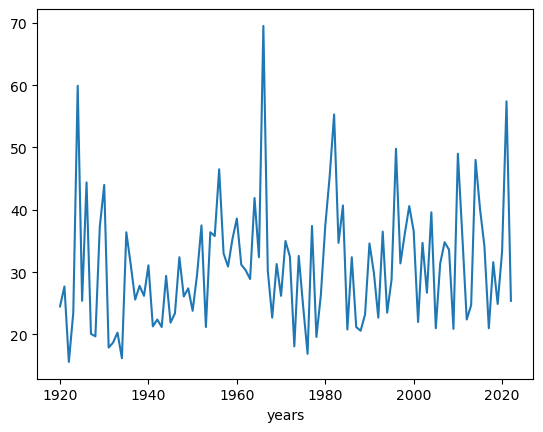

In [5]:
precipitation.plot()

In this tutorial we will compute the return period for each event in the dataset (each maximum precipitation value for that year). To do this we first need to rank the precipitation levels from
high to low with the sort function. Save the sorted data in the first column of a matrix called 
"precip" with four columns and as many rows as there are data entries.

In the second column you store the ranks of each value (highest = 1; lowest = 103) 


In [13]:
precip_df = pd.DataFrame(index=np.arange(data.precipitation.size))

In [14]:
precip_df['sorted'] = np.sort(data.precipitation)[::-1]

In [15]:
precip_df['ranks'] = np.arange(data.precipitation.size)

As you might have noticed there are some precipitation values that appear twice. These should have
the same rank so we want to fix that first... we can instead use the scipy function rankdata to find the 
rank of each value - this function will give similar values the same rank. Of course the ranks also
have to be sorted before putting them in our matrix.


In [16]:
precip_df['ranks_sp'] = np.sort(stats.rankdata(-data.precipitation))

We can compute the empirical probability of exceedance by dividing the rank (r) by the total
amount of values (n) plus 1.


In [17]:
n = data.precipitation.size
P = precip_df['ranks_sp']/(n+1)
precip_df['exceedance'] = P

The return period and the chance of exceedence are related through through T = 1/P

In [ ]:
precip_df['period'] = 1 / precip_df['exceedance']

In [ ]:
precip_df

,sorted,ranks,ranks_sp,exceedance,period
0,69.5,0,1.0,0.009615,104.000000
1,59.9,1,2.0,0.019231,52.000000
2,57.4,2,3.0,0.028846,34.666667
3,55.3,3,4.0,0.038462,26.000000
4,49.8,4,5.0,0.048077,20.800000
...,...,...,...,...,...
98,18.1,98,99.0,0.951923,1.050505
99,17.9,99,100.0,0.961538,1.040000
100,16.9,100,101.0,0.971154,1.029703
101,16.2,101,102.0,0.980769,1.019608


Now that we know the return periods of each annual maximum precipitation level we can create
a return level plot - a plot of return levels against return periods:

Text(0, 0.5, 'Return level')

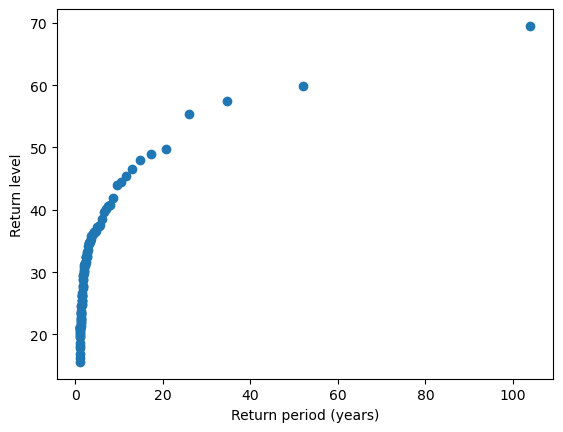

In [20]:
plt.plot(precip_df['period'],precip_df['sorted'],'o')
plt.xlabel('Return period (years)')
plt.ylabel('Return level')